# Logistic Regression with Python

For these notes I'll be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

Try to predict a classification- survival or deceased.
Begin understanding of implementing Logistic Regression in Python for classification.

Use a "semi-cleaned" version of the titanic data set, using the data set hosted directly on Kaggle, mean you'd need to do some additional cleaning not shown in this notebook.

Full explantion and maths of Logistic Regression in: Introduction to Statistical Learning, by Gareth James, et al. Sections 4-4.3

Logistic regression <-> binary classification <-> supervised learning

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('C:/Users/kevin/OneDrive/Upskill_Puthon_DS/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

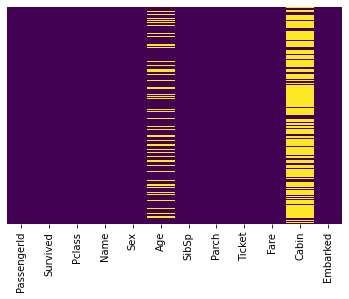

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

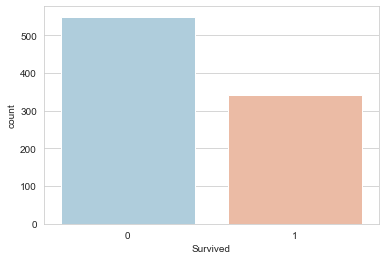

In [17]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', data=train, palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

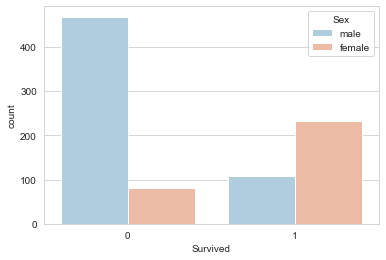

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r')

>> It seems that males were most likely to not survive comapred to females

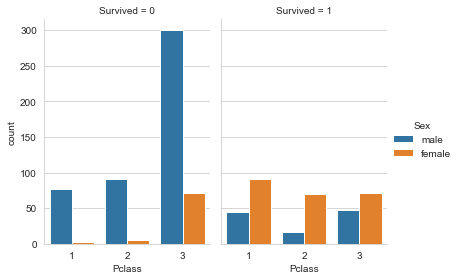

In [26]:
g = sns.catplot(x='Pclass', hue='Sex', col='Survived',
                data=train, kind='count',
                height=4, aspect=.7);

<AxesSubplot:xlabel='Survived', ylabel='count'>

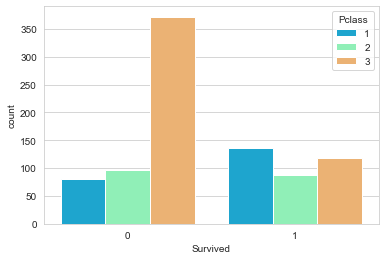

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

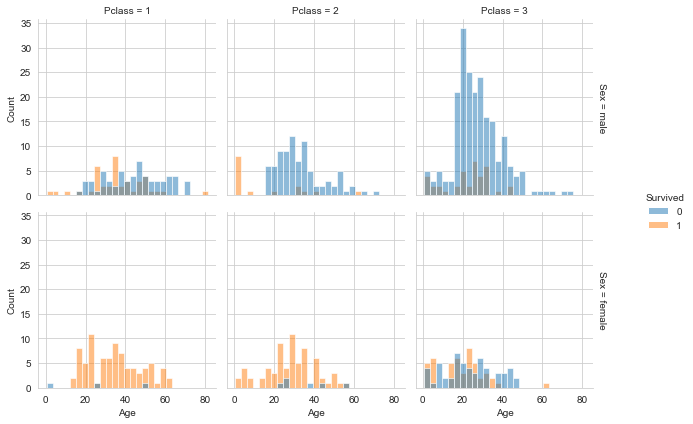

In [73]:
bins = np.arange(0, 80, 5)
sns.displot(
    train, x="Age", col="Pclass", row="Sex", hue='Survived',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

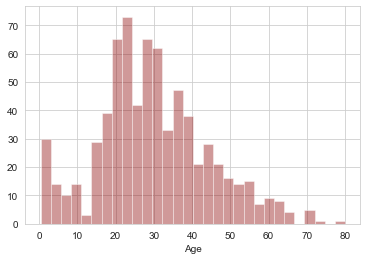

In [20]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

>> Seems to be bimodal - skewed to younger age at begnining and then normalises around 30 years

* Now look at the ticket purchase prices - most ticket prices are distributed towards the lower/cheaper end. Most pasengers are in the cheaper 3rd class

<AxesSubplot:>

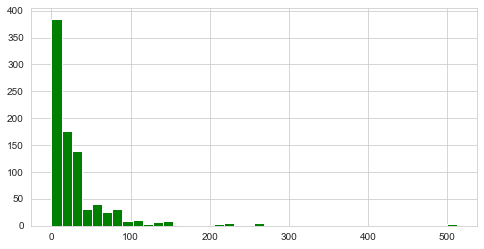

In [21]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Swarm and Violin plots
Although the following swarm and violin plots show the same data like the countplots or distplots before,
they can reveal ceratin details that disappear in other plots. However, it takes more time to study these plots in detail.

In [35]:
cm_surv = ["darkgrey" , "lightgreen"]

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



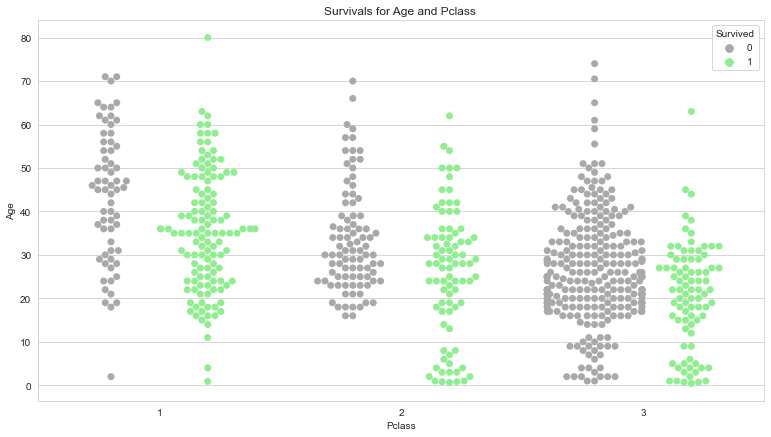

In [44]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



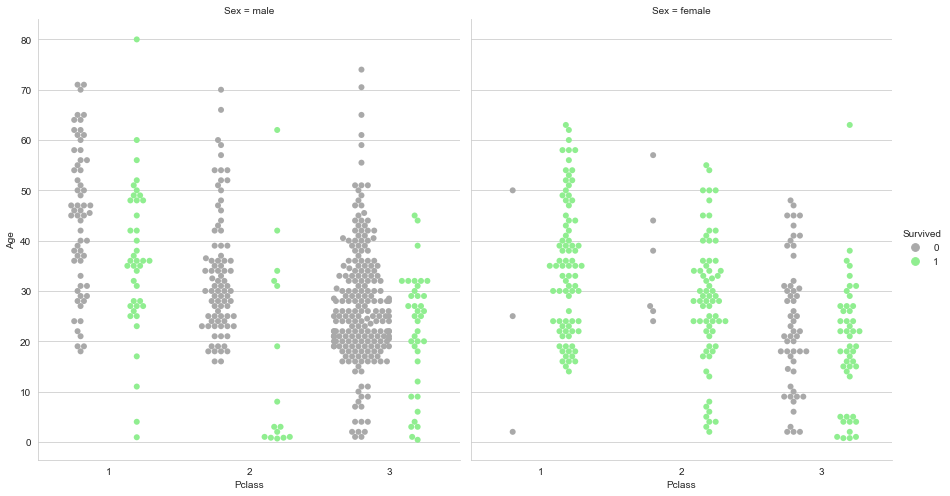

In [90]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="swarm", dodge=True, palette=cm_surv, height=7, aspect=.9, s=6)

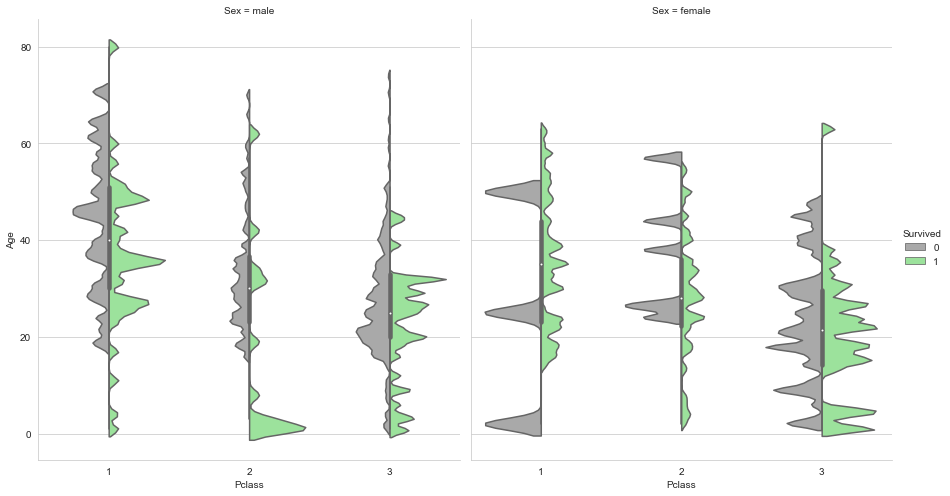

In [47]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="violin", split=True, bw=0.05, palette=cm_surv, height=7, aspect=.9, s=7)

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Pclass', ylabel='Age'>

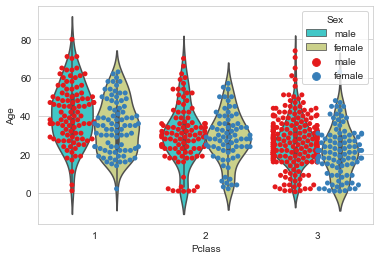

In [76]:
sns.violinplot(x='Pclass',y='Age',data=train,hue='Sex',palette='rainbow',dodge=True)
sns.swarmplot(x='Pclass',y='Age',data=train,hue='Sex',palette='Set1',dodge=True)

<AxesSubplot:>

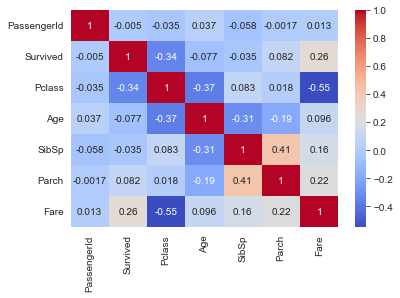

In [77]:
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [22]:
import cufflinks as cf
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

>> NOTE: Could create a model that predicts age based off all the features. But for now, I'll go ahead and use this simple imputation by computing the average age